In [21]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 

#laod_dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



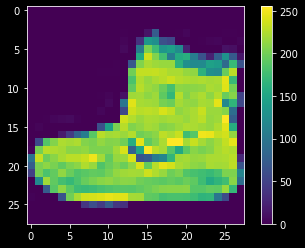

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0

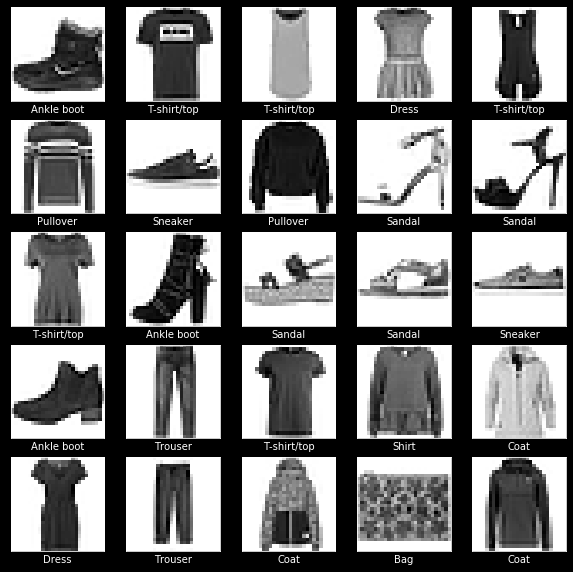

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
#build the model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#train the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.4981 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3744 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.3355 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3115 - accuracy: 0.8862
Epoch 5/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2938 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2778 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2665 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2558 - accuracy: 0.9057
Epoch 9/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2471 - accuracy: 0.9071
Epo

In [26]:
#evaluate accuracy

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2734 - accuracy: 0.8840

Test accuracy: 0.884


In [27]:
#make predictions
predictions = model.predict(test_images)#返回的是一个预测率的数组,每一个的预测结果都是一个数组，里面存放每个种类的自行度

print("predictions[0]:{}".format(predictions[0]))
print("\n max_confidence:{}".format(np.argmax(predictions[0])))#找出最接近的那个

predictions[0]:[6.8039463e-09 1.3346404e-08 7.0795297e-10 1.5294249e-09 1.4865288e-09
 7.8668432e-05 1.2305934e-08 1.0658613e-02 2.9414233e-08 9.8926264e-01]

 max_confidence:9


In [30]:
predictions[0]
#test_labels[0]

array([6.8039463e-09, 1.3346404e-08, 7.0795297e-10, 1.5294249e-09,
       1.4865288e-09, 7.8668432e-05, 1.2305934e-08, 1.0658613e-02,
       2.9414233e-08, 9.8926264e-01], dtype=float32)

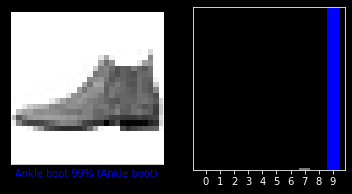

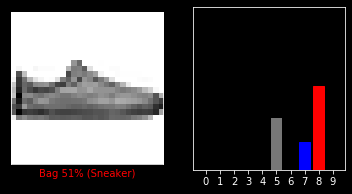

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

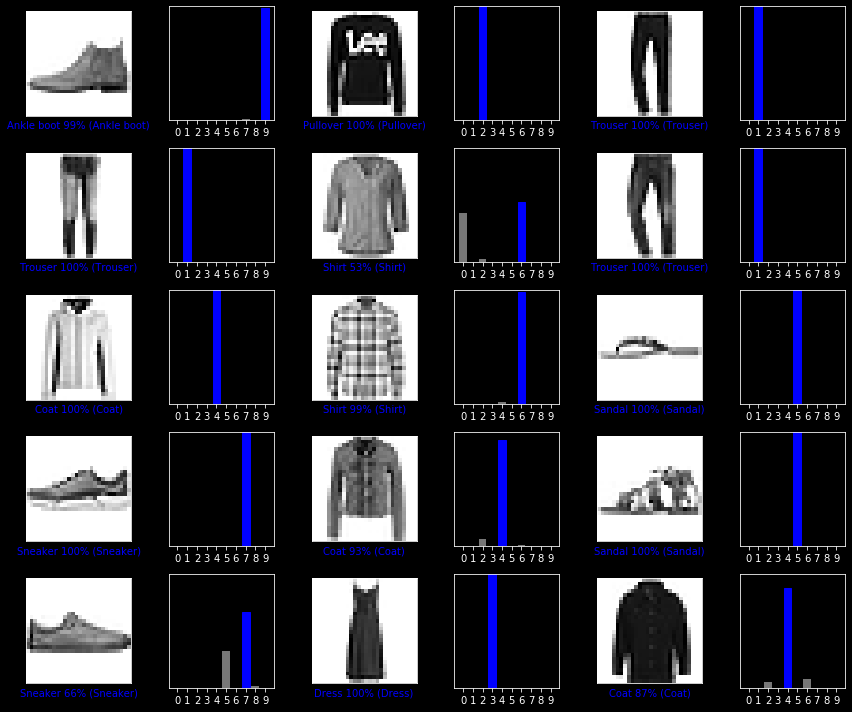

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[6.0737892e-07 4.9842785e-13 9.9975842e-01 6.1888329e-12 2.2091564e-04
  2.3911793e-15 2.0070573e-05 6.6778059e-18 6.8990477e-12 7.3881051e-18]]


2

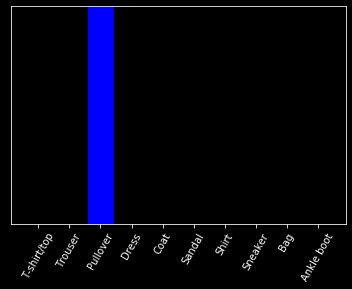

In [35]:
#对单个图像进行预测

img = test_images[1]

print(img.shape)


"""
对模型进行了优化，可以一次对一批或一组示例进行预测。
因此，即使您使用的是单个图像，也需要将其添加到列表中
"""
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=60)

np.argmax(predictions_single[0])


In [2]:
!pip install tensorflow_hub

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 92kB 2.1MB/s 


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np 
import tensorflow as tf 
import tensorflow_hub as hub 
import tensorflow_datasets as tfds 



# 将训练集按照 6:4 的比例进行切割，从而最终我们将得到 15,000
# 个训练样本, 10,000 个验证样本以及 25,000 个测试样本

train_validation_split = tfds.Split.TRAIN.subsplit([6, 4])

(train_data, validation_data), test_data = tfds.load(
    name="imdb_reviews",
    split=(train_validation_split, tfds.Split.TEST),
    as_supervised=True)

#数据集下载太慢了

In [6]:
#对预处理文本进行文本分类

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0


In [7]:
"""
IMDB 数据集已经打包在 Tensorflow 中。
该数据集已经经过预处理，评论（单词序列）已经被转换为整数序列，
其中每个整数表示字典中的特定单词。
"""

imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 98s 6us/step


参数 num_words=10000 保留了训练数据中最常出现的 10,000 个单词。为了保持数据规模的可管理性，低频词将被丢弃

In [15]:
#探索数据
#该数据集是经过预处理的：每个样本都是一个表示影评中词汇的整数数组。每个标签都是一个值为 0 或 1 的整数值
#0 代表消极，1 代表积极

print("Training entries: {}, labels: {} \n".format(len(train_data), len(train_labels)))
print(train_data[0],"\n")

print(len(train_data[0]),len(train_data[1]))


Training entries: 25000, labels: 25000 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

218 189


In [24]:
#将整数转换为单词，创建一个辅助函数来查询一个包含了整数到字符串映射的字典对象：

#一个映射单词到整数索引的词典
word_index = imdb.get_word_index()

#保留第一个索引,所有的索引值都+3，空出 0-3 设置新的值
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3

print(word_index)

reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

#print(reverse_word_index)

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

rmatted': 34649, 'drooping': 88156, 'zelig': 76036, 'yakusyo': 88157, 'lunceford': 82060, 'editorializing': 88158, 'plywood': 34650, 'banalities': 88159, 'nestor': 30539, 'revitalizes': 64829, 'voguing': 40755, 'sedate': 21669, 'dictum': 51860, 'brasher': 88160, 'york': 782, 'unchallengeable': 88161, 'subtelly': 88162, 'opposition': 8775, 'fetchingly': 88163, "'secrets": 70079, 'appearance\x85': 88164, 'teleflick': 88165, 'viennese': 19484, 'orphanage': 10079, 'movers': 40756, "cameraman's": 27608, "cameraman't": 88166, 'pornoes': 88167, 'embodiments': 51861, 'heorine': 88168, 'fraternity': 16108, "'procedures'": 88169, 'finds': 659, 'caratherisic': 88170, 'munshi': 27609, 'clashing': 20587, "mjh's": 40757, 'lärm': 88171, 'nikah': 76040, 'incandescent': 51862, 'stowing': 51863, 'acrid': 51864, 'eyewitness': 25216, 'maniacally': 24004, 'suspenders': 51866, 'acupat': 57063, 'nominee': 11585, 'toshiro': 23370, "'anita": 51867, 'ciannelli': 25217, 'clyde': 8289, 'posher': 76042, 'johannes'

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [25]:
"""
准备数据
影评——即整数数组必须在输入神经网络之前转换为张量？

在同构的意义下，第零阶张量 （r = 0） 为标量 （Scalar），第一阶张量 （r = 1） 为向量 （Vector）， 第二阶张量 （r = 2） 则成为矩阵 （Matrix）。

我们可以填充数组来保证输入数据具有相同的长度，然后创建一个大小为 max_length * num_reviews 的整型张量。我们可以使用能够处理此形状数据的嵌入层作为网络中的第一层。
"""

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

len(train_data[0]),len(train_data[1])

print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 


### 构建模型
神经网络由堆叠的层来构建，这需要从两个主要方面来进行体系结构决策：

- 模型里有多少层？
- 每个层里有多少隐层单元（hidden units）？


在此样本中，输入数据包含一个单词索引的数组。要预测的标签为 0 或 1。让我们来为该问题构建一个模型：



In [26]:
#输入形状是用于电影评论的词汇数目（10000 词）

vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 206us/sample - loss: 0.6918 - accuracy: 0.5886 - val_loss: 0.6895 - val_accuracy: 0.7446
Epoch 2/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6851 - accuracy: 0.7174 - val_loss: 0.6802 - val_accuracy: 0.7475
Epoch 3/40
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6703 - accuracy: 0.7512 - val_loss: 0.6613 - val_accuracy: 0.7552
Epoch 4/40
15000/15000 [==============================] - 1s 62us/sample - loss: 0.6436 - accuracy: 0.7701 - val_loss: 0.6309 - val_accuracy: 0.7710
Epoch 5/40
15000/15000 [==============================] - 1s 59us/sample - loss: 0.6046 - accuracy: 0.7887 - val_loss: 0.5911 - val_accuracy: 0.7898
Epoch 6/40
15000/15000 [==============================] - 1s 61us/sample - loss: 0.5568 - accuracy: 0.8161 - val_loss: 0.5459 - val_accuracy: 0.8070
Epoch 7/40
15000/15000 [==============================]

In [31]:
#评估模型
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

25000/1 - 3s - loss: 0.3362 - accuracy: 0.8704
[0.3397510530376434, 0.87036]


创建一个准确率（accuracy）和损失值（loss）随时间变化的图表
model.fit() 返回一个 History 对象，该对象包含一个字典，其中包含训练阶段所发生的一切事件

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

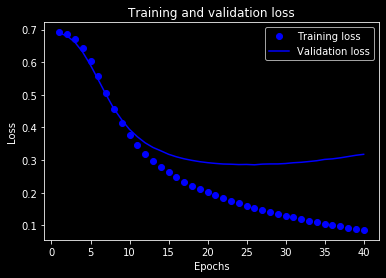

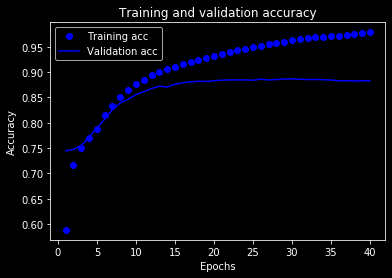

In [34]:
import matplotlib.pyplot as plt 

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc)+1)

plt.clf()   # 清除数字


# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()